<a href="https://colab.research.google.com/github/FProencadeAlbuquerque/PhD_Analysis/blob/main/AnaliseParam_Modelo_ExtraTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math as m
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

In [3]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    aux=[]
    for i in range(len(y_true)):
      if np.array(y_true)[i] !=0:
        desv=(abs((np.array(y_true)[i]-np.array(y_hat)[i])/np.array(y_true)[i]))
        aux.append(desv)
      else:
        aux.append(0)
    MAPE=abs(100*np.mean(aux))
    print('{} set RMSE:{}, R2:{}, MAPE:{}'.format(label, rmse, variance,MAPE))

In [4]:
def evaluate2(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    aux=[]
    for i in range(len(y_true)):
      if np.array(y_true)[i] !=0:
        desv=(abs((np.array(y_true)[i]-np.array(y_hat)[i])/np.array(y_true)[i]))
        aux.append(desv)
      else:
        aux.append(0)
    MAPE=abs(100*np.mean(aux))
    return MAPE

In [5]:
df = pd.read_csv('/content/drive/MyDrive/AlgoritmosDOC/ArtigoInduscon/Bus14.csv', sep = ',')
target = 'LoadMargin'
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

# Análise para a **profundidade das árvores**


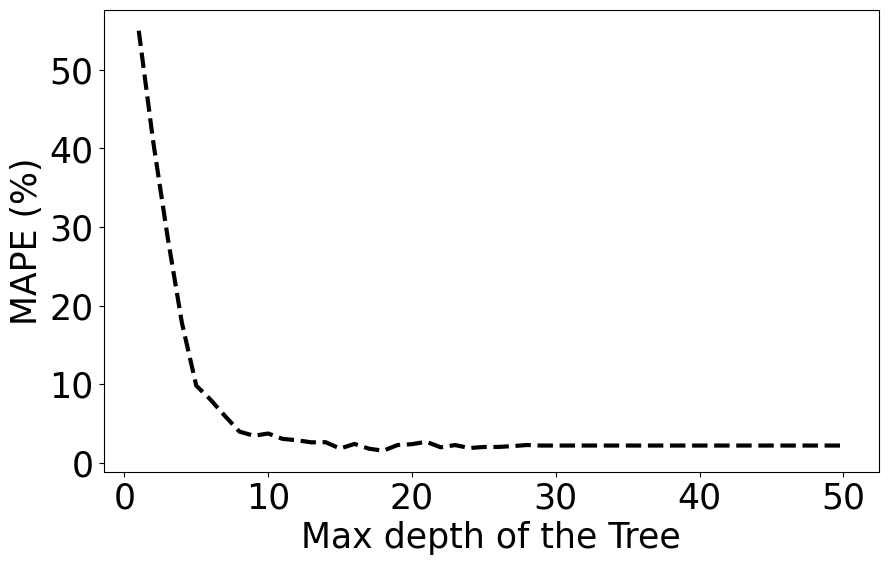

In [6]:
Y1=df['LoadMargin']

X1=df.drop(columns=['LoadMargin'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42, shuffle=True)

#rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=1,random_state=42).fit(X_train1, y_train1)

MAPE_depth=[]

for i in range(50):

  et = ExtraTreesRegressor(n_estimators=50,max_depth=i+1,random_state=42).fit(X_train1, y_train1)

  y_predict_train=et.predict(X_train1)
  y_predict_test=et.predict(X_test1)

  MAPE_depth.append(evaluate2(y_test1,y_predict_test))

max_depth=[i+1 for i in range(50)]

fig, ax = plt.subplots(figsize = (10,6))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Max depth of the Tree',**axis_font)
plt.ylabel('MAPE (%)',**axis_font)
plt.yticks(fontsize=25,**axis_font)
plt.xticks(fontsize=25,**axis_font)

plt.plot(max_depth,MAPE_depth,'k--',linewidth=3.0)

plt.show()

# Análise para a **número mpinimo de amostras por split**

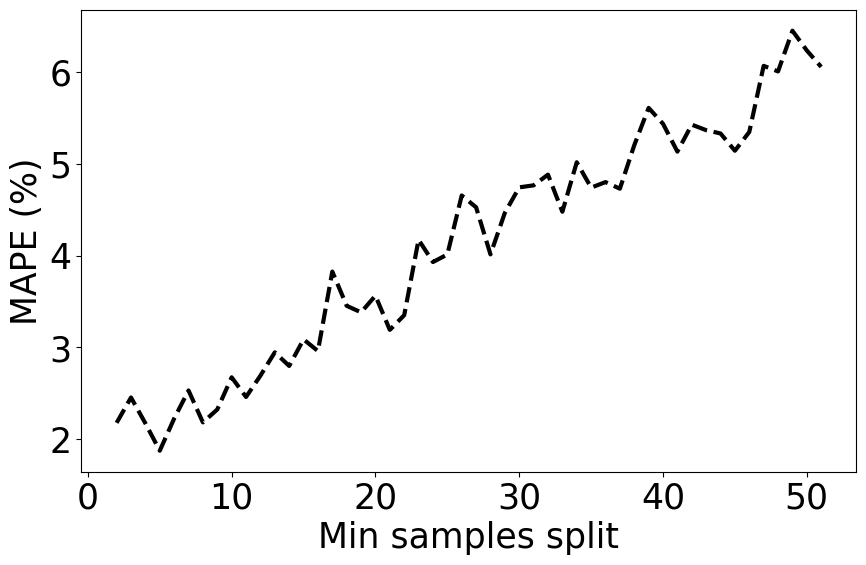

In [7]:
Y1=df['LoadMargin']

X1=df.drop(columns=['LoadMargin'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42, shuffle=True)

#rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=1,random_state=42).fit(X_train1, y_train1)

MAPE_min_split=[]

N=np.linspace(2,51,50)

for n in N:

  et = ExtraTreesRegressor(n_estimators=50,min_samples_split=int(n),random_state=42).fit(X_train1, y_train1)

  y_predict_train=et.predict(X_train1)
  y_predict_test=et.predict(X_test1)

  MAPE_min_split.append(evaluate2(y_test1,y_predict_test))

fig, ax = plt.subplots(figsize = (10,6))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Min samples split',**axis_font)
plt.ylabel('MAPE (%)',**axis_font)
plt.yticks(fontsize=25,**axis_font)
plt.xticks(fontsize=25,**axis_font)

plt.plot(N,MAPE_min_split,'k--',linewidth=3.0)

plt.show()

# Análise para a **número de estimadores**

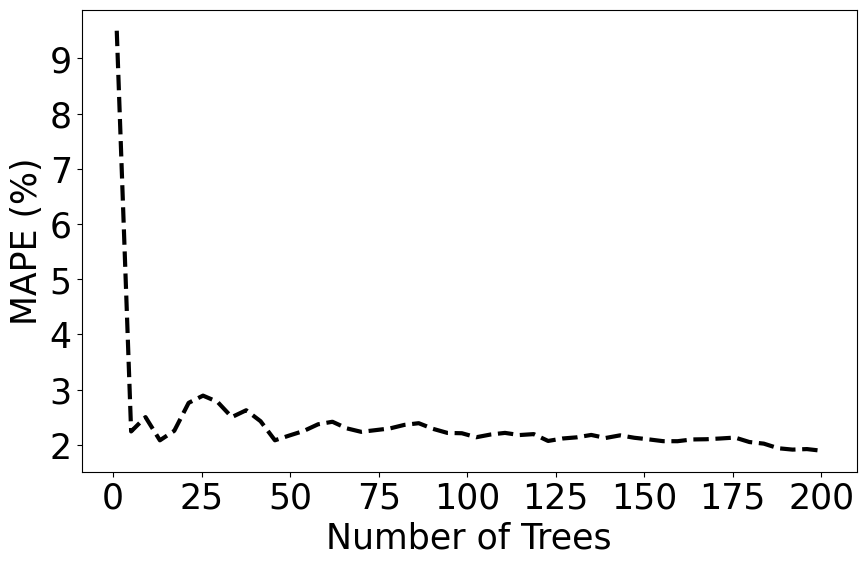

In [8]:
Y1=df['LoadMargin']

X1=df.drop(columns=['LoadMargin'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42, shuffle=True)

#rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=1,random_state=42).fit(X_train1, y_train1)

MAPE_Trees=[]

N=np.linspace(1,200,50)

for n in N:

  et = ExtraTreesRegressor(n_estimators=int(n),random_state=42).fit(X_train1, y_train1)

  y_predict_train=et.predict(X_train1)
  y_predict_test=et.predict(X_test1)

  MAPE_Trees.append(evaluate2(y_test1,y_predict_test))

fig, ax = plt.subplots(figsize = (10,6))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Number of Trees',**axis_font)
plt.ylabel('MAPE (%)',**axis_font)
plt.yticks(fontsize=25,**axis_font)
plt.xticks(fontsize=25,**axis_font)

plt.plot(N,MAPE_Trees,'k--',linewidth=3.0)

plt.show()

# Análise para a **número mpinimo de amostras por folha**

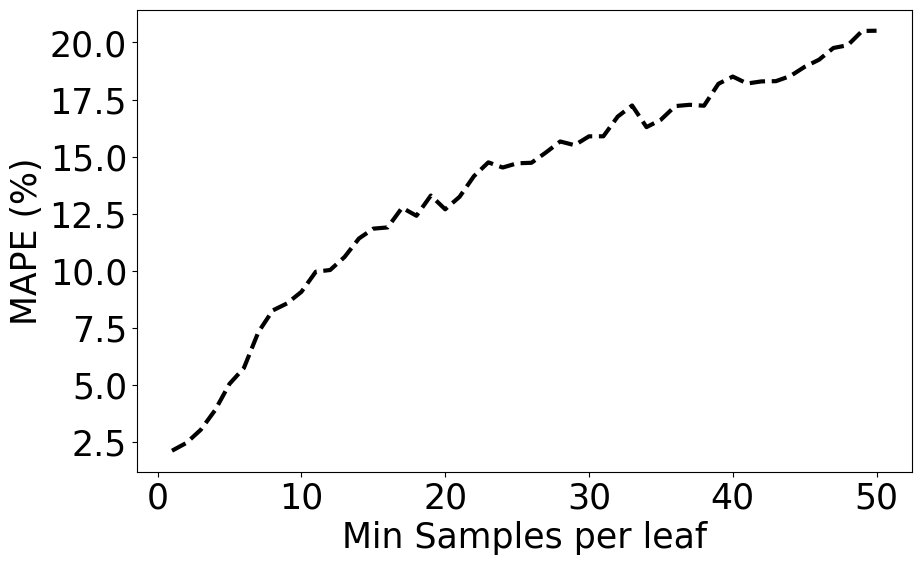

In [9]:
Y1=df['LoadMargin']

X1=df.drop(columns=['LoadMargin'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.3, random_state=42, shuffle=True)

MAPE_samples_leaf=[]

K=np.linspace(1,50,50)

for k in K:

  et = ExtraTreesRegressor(n_estimators=100,min_samples_leaf=int(k),random_state=42).fit(X_train1, y_train1)

  y_predict_train=et.predict(X_train1)
  y_predict_test=et.predict(X_test1)

  MAPE_samples_leaf.append(evaluate2(y_test1,y_predict_test))

fig, ax = plt.subplots(figsize = (10,6))

axis_font = {'fontname':'sans-serif', 'size':'25'}

plt.xlabel('Min Samples per leaf',**axis_font)
plt.ylabel('MAPE (%)',**axis_font)
plt.yticks(fontsize=25,**axis_font)
plt.xticks(fontsize=25,**axis_font)

plt.plot(K,MAPE_samples_leaf,'k--',linewidth=3.0)

plt.show()

# **Para salvar em CSV**

In [ ]:
data = {'Min_samples_leaf':K,
        'MAPE_samples_leaf': MAPE_samples_leaf,
        }
 
# Create DataFrame
df = pd.DataFrame(data)
 
df.to_csv ('/content/drive/MyDrive/AlgoritmosDOC/ArtigoInduscon/dataframe_min_samples_leaf.csv', index = False, header=True)